In [1]:
import pandas as pd
import numpy as np
from autumn.tools.project import get_project

In [2]:
# Set this True if you are running the 'reference' model, or False for the comparison model
# You will need to run the reference model first in order to generate the reference ouputs for comparison
# Generally this involves checking out different branches or commits in the background
# Remember to restart the notebook in between checkouts!
# I'm going to adopt a convention that I checkout master to run the reference model
# and compare that against the comparison model on my branch

REFERENCE_MODEL = False

In [3]:
# Set this for the region you're verifying
# This could be extended to a loop that verifies multiple regions, but it's just one for now
region = "nepal"

In [4]:
project = get_project("covid_19", region)

In [5]:
model = project.run_baseline_model(project.param_set.baseline)

In [6]:
odf = model.get_derived_outputs_df()

In [7]:
if REFERENCE_MODEL:
    # Save the reference outputs to CSV
    odf.to_pickle(f"ref_{region}.pkl")
    # Load the comparison outputs
    # This will raise an exception if you haven't run the comparison model yet
else:
    # Dump the comparison outputs to CSV
    odf.to_pickle(f"comp_{region}.pkl")
    # Load the reference outputs for comparison
   
odf_comp = pd.read_pickle(f"comp_{region}.pkl")
odf_ref = pd.read_pickle(f"ref_{region}.pkl")

In [8]:
diff = (odf_comp - odf_ref)

In [9]:
# Print the absolute maximum difference (error)

# This is a bit arbitrary, but should cover most cases
THRESH = 1e-10

max_error = diff.abs().max().max()
print(f"Maximum error: {max_error}")
assert(max_error < THRESH)

Maximum error: 0.0


<AxesSubplot:>

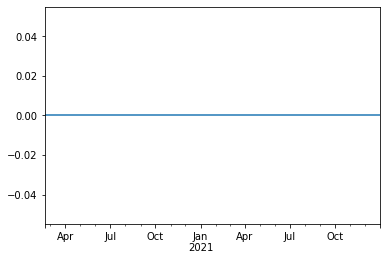

In [10]:
# Print the summed numerical error (across all dervied outputs) over time
# This should look randomly (and hopefully normally-ish) distributed

diff.sum(axis=1).plot()